## Imports
Import the necessary libraries to run the notebook. The libraries imported are Pandas, Seaborn, Matplotlib and adjustText. adjustText allows for the adjustment of text labels in a plot, making them easier to read. 

In [ ]:
#!pip install adjustText

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from adjustText import adjust_text
import itertools
sns.set()

Read the data from the .csv file "witches.csv" and select specific columns from the dataframe. Rename one of the columns for an easier name.

In [3]:
df= pd.read_csv ("witches.csv", usecols=['num_sales', 'last_sale.total_price','token_id'])
df.rename(columns={'last_sale.total_price': 'ETH_price'}, inplace=True)
df.head()

,num_sales,token_id,ETH_price
0,0,1,NaN
1,0,2,NaN
2,0,3,NaN
3,0,4,NaN
4,0,5,NaN


#### We are interested in those where there was a sale. 

Filter the dataframe to only include rows where the number of sales is not equal to zero. Convert the ETH_price column from a long int to float.

In [4]:
df = df[df.num_sales != 0]
df['ETH_price']=df['ETH_price']*10**-18
df.head()

<ipython-input-4-04eee5892e84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ETH_price']=df['ETH_price']*10**-18


,num_sales,token_id,ETH_price
11,7,12,1.19
12,2,13,1.90
18,1,19,1.77
19,1,20,0.23
20,1,21,0.23


In [5]:
df.describe()

,num_sales,token_id,ETH_price
count,4898.000000,4898.000000,4896.000000
mean,1.763169,5743.497142,1.188882
std,1.025036,2802.414413,1.113854
min,1.000000,12.000000,0.010000
25%,1.000000,3463.750000,0.222000
50%,1.000000,6067.500000,0.950000
75%,2.000000,8219.750000,1.942500
max,9.000000,9749.000000,12.888800


#### Visualizing ETH Price - displot
Generate a visualization of the Ethereum price data using a seaborn displot. This visualization will include a kernel density estimation (KDE) line, which is a smoothed line that shows the general trend of the data.

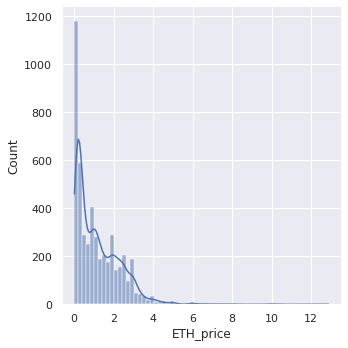

In [6]:
sns.displot(df.ETH_price, kde=True)

#### Visualizing ETH Price - boxplot with Pandas

Generate a boxplot of the Ethereum price data. This visualization will show the distribution of the data, including the median, quartiles, and outliers.

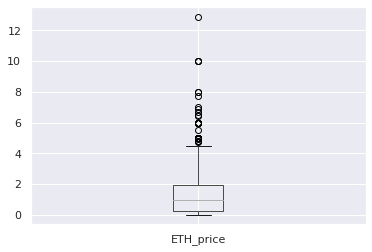

In [7]:
boxplot = df.boxplot(column=['ETH_price'])  

#### Visualizing ETH Price - boxplot with Seaborn

Generate a boxplot of the Ethereum price data using the Seaborn library. Same as above, the visualization shows the distribution of the data, including median, quartiles and outliers. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ETH_price'>

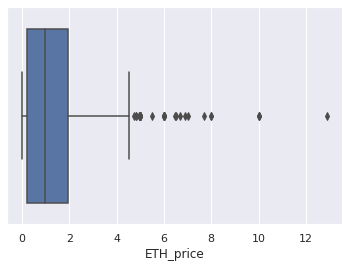

In [8]:
sns.boxplot(df.ETH_price)

## IQR Method 

1.  `q25,q75 = df.ETH_price.quantile([0.25,0.75])` calculates Q1 and Q3 of the Ethereum price data. 
2.  `iqr = q75-q25` will calculate the interquartile range (IQR) of the data. 
3.  `outlier_bottom_lim = q25 - 1.5*iqr` and `outlier_top_lim = q75 + 1.5*iqr` will calculate the lower and upper limits of the outliers, respectively. 

In [9]:
q25,q75 = df.ETH_price.quantile([0.25,0.75])

iqr = q75-q25
outlier_bottom_lim = q25 - 1.5*iqr
outlier_top_lim = q75 + 1.5*iqr

print(q25,q75,iqr, outlier_bottom_lim, outlier_top_lim)

0.222 1.9425000000000001 1.7205000000000001 -2.35875 4.52325


## Plot and Outlier identification

#### Identifying IDs that are Outliers
Create an empty list to store the values of the price outliers and another one for the token IDs of the outliers. Loop through each row of the dataframe checking if the Ethereum price is greater than the upper limit or lower than the lower limit of the outliers. If the price is outside those boundaries, add the Ethereum price and the ID of the token to the corresponding list.

In [10]:
outliers=[]
outlier_id=[]

for row in df.itertuples(index=False):
    token_id = row[1]
    val = row[2]
    if val > outlier_top_lim or val < outlier_bottom_lim :
        outliers.append (val)
        outlier_id.append (token_id)

#### Creating a Dataframe of Outliers
Create a dataframe from the lists of outliers and outlier IDs and remove any duplicate values from the dataframe.

In [11]:
df_outliers = pd.DataFrame(list(zip(outliers, outlier_id)),
               columns =['outliers', 'outlier_id'])
df_outliers.drop_duplicates(subset=['outliers'], inplace=True)

#### Visualizing Outliers
Generate a boxplot of the Ethereum price data using the Seaborn library. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


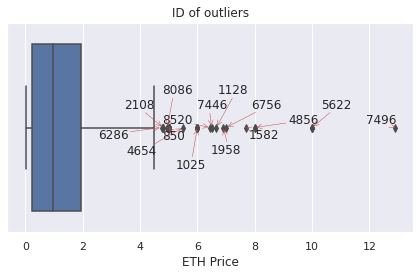

In [12]:
text = df_outliers.outlier_id.tolist()
x_ = df_outliers.outliers.tolist()
y_zero=itertools.repeat(0)

boxplot = sns.boxplot(df.ETH_price)
texts = []
for x, y, s in zip(x_, y_zero, text):
    texts.append(plt.text(x, y, s))

plt.xlabel("ETH Price")
plt.title("ID of outliers")
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
plt.tight_layout()
plt.show()

## Outliers review

#### Visualizing ETH Price of Outliers by Year

Extract year from timestamp and add as a separate column. 

In [13]:
df= pd.read_csv ("witches.csv", usecols=['token_id', "num_sales", 'name','description', "last_sale.total_price","last_sale.transaction.timestamp",
                                         'Rising Sign','Woe', 'Wonder','Outerwear', 'Eyebrows', 'Wisdom', 'Body Shape', 'Moon Sign', 'Will', 'Hair Color','external_link'])
df.rename(columns={'last_sale.total_price': 'ETH_price'}, inplace=True)
df['ETH_price']=df['ETH_price']*10**-18
df['last_sale.transaction.timestamp']=pd.to_datetime(df['last_sale.transaction.timestamp'])
df['year']=df['last_sale.transaction.timestamp'].dt.year

Create a new dataframe containing only the rows with token_id values that are in the list of outliers.

In [14]:
df_outliers = df[df['token_id'].isin(outlier_id)]

#### Visualizing ETH Price of Outliers with Pairplot
Create a pairplot of the ETH price of the outliers. The pairplot will show the relationship between the ETH price of the outliers and other variables in the dataframe.

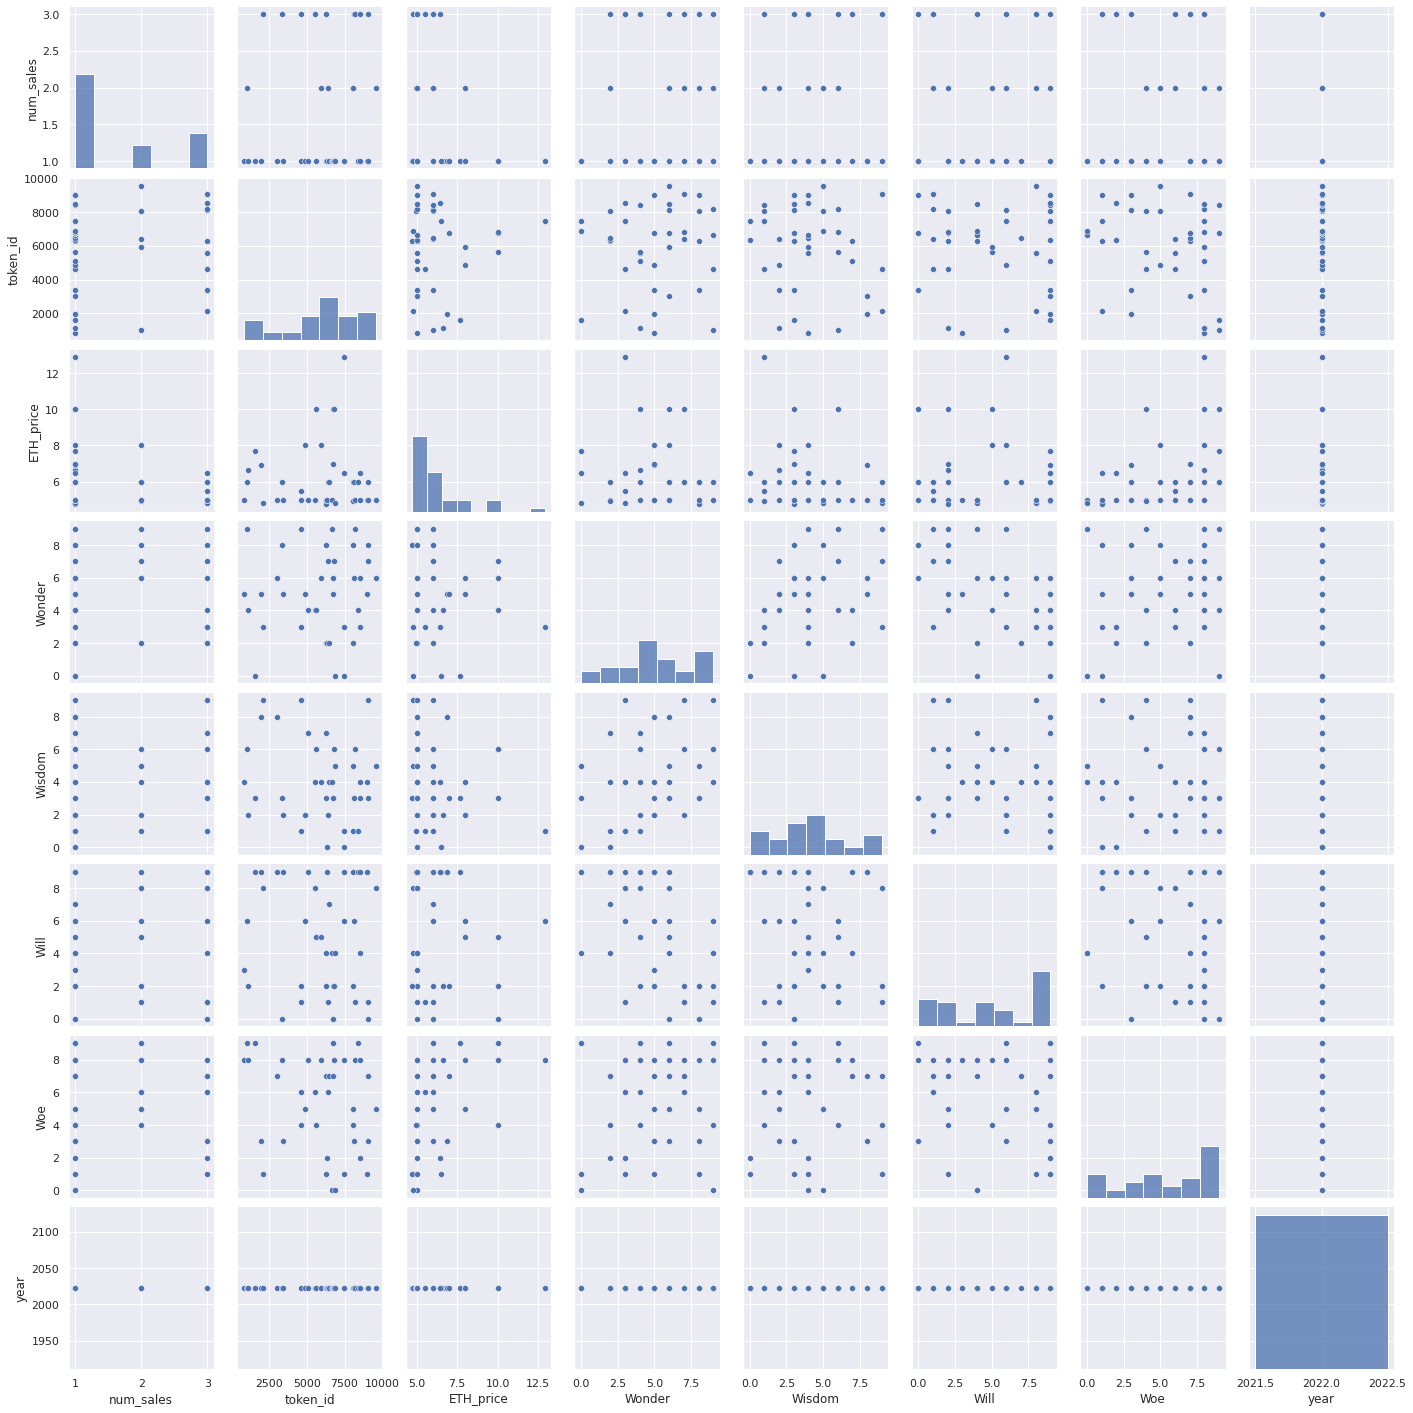

In [15]:
sns.pairplot(df_outliers) 

#### Visualizing Traits of Outliers with Countplot
Create a countplot of the traits of the outliers IDs. The countplot will show the distribution of the traits of the outliers and how many of each trait are present in that filtered dataframe.

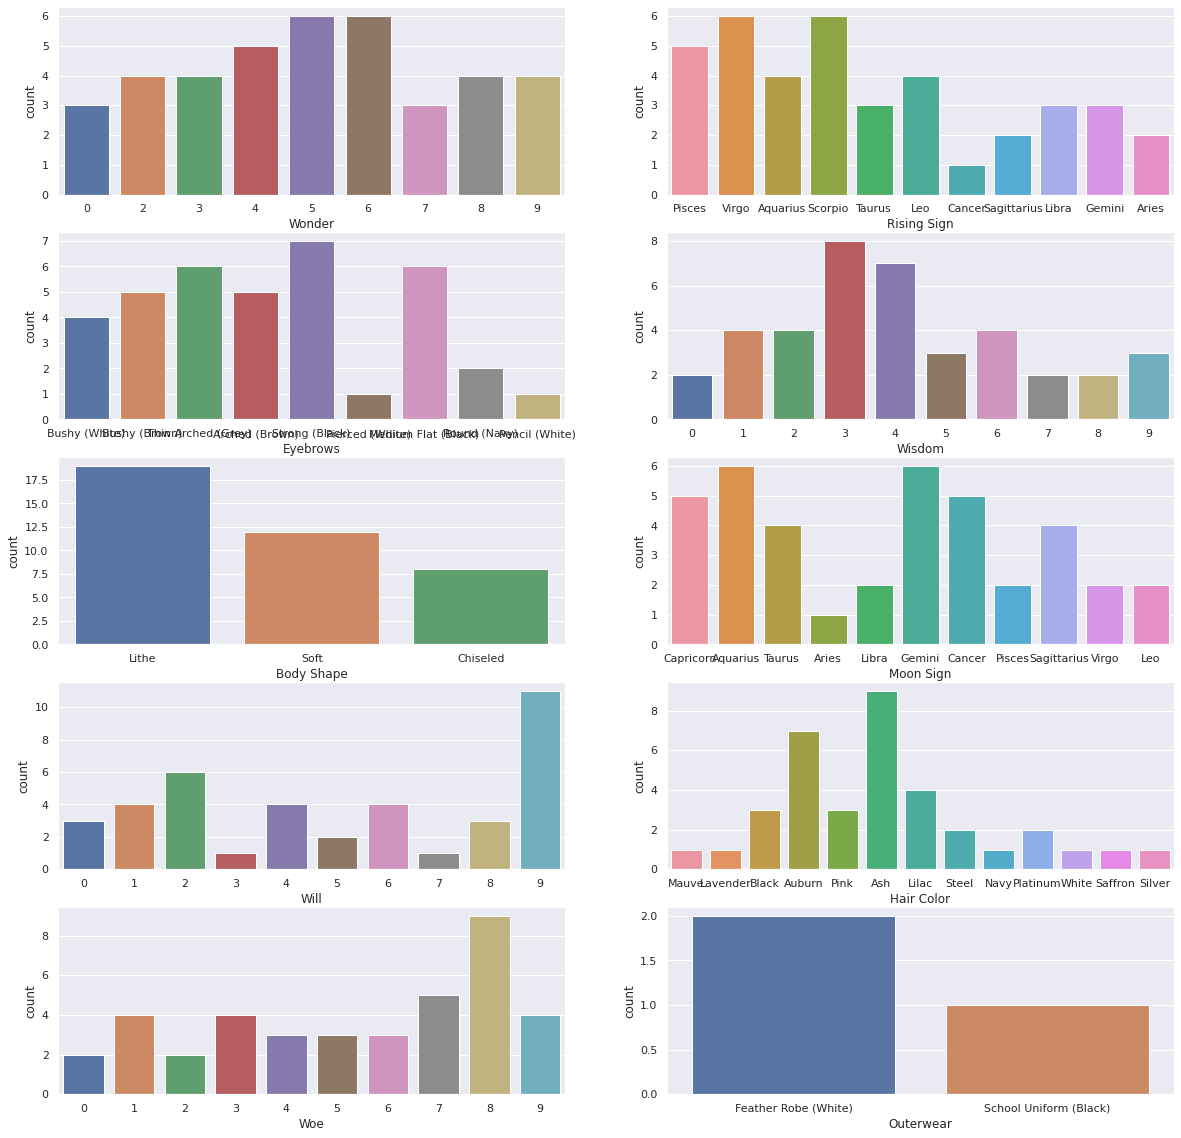

In [16]:
traits = df_outliers[[ 'Wonder', 'Rising Sign', 'Eyebrows', 'Wisdom', 'Body Shape', 'Moon Sign', 'Will', 'Hair Color', 'Woe', 'Outerwear']]
fig , ax = plt.subplots(5,2,figsize = (20,20)) 
for i , subplots in zip (traits, ax.flatten()):  
  sns.countplot(x=traits[i],ax = subplots)
plt.show()